## Data Science project about Pokemons

Made by Yurakhno Konstantin BAE'25.

This project will immerse you in the Pokemon dataset. Various tools will be used here so that the project meets the requirements for this project/homework.

In [753]:
# Upload necessary libraries:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import requests
from bs4 import BeautifulSoup
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [754]:
# Set convenience working directory
path = r"C:\Users\yurak\Downloads"
os.chdir(path)

In [700]:
# Read the data about pokemons.
# I've downloaded this from this page: 
# https://www.kaggle.com/datasets/rounakbanik/pokemon?datasetId=2756
pokemon = pd.read_csv('pokemon.csv', index_col='pokedex_number')

# Here I'll delete useless for my analysis columns
pokemon.drop(columns=['against_bug', 'against_dark', 'against_dragon', 
                        'against_electric', 'against_fairy', 'against_fight',
                        'against_fire', 'against_flying','against_ghost',
                        'against_grass', 'against_ground', 'against_ice',
                        'against_normal', 'against_poison', 'against_psychic',
                        'against_rock', 'against_steel', 'against_water',
                        'japanese_name'], inplace=True)

# Let's get information about our dataframe and look at df
print(pokemon.info())
pokemon.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   attack             801 non-null    int64  
 2   base_egg_steps     801 non-null    int64  
 3   base_happiness     801 non-null    int64  
 4   base_total         801 non-null    int64  
 5   capture_rate       801 non-null    object 
 6   classfication      801 non-null    object 
 7   defense            801 non-null    int64  
 8   experience_growth  801 non-null    int64  
 9   height_m           781 non-null    float64
 10  hp                 801 non-null    int64  
 11  name               801 non-null    object 
 12  percentage_male    703 non-null    float64
 13  sp_attack          801 non-null    int64  
 14  sp_defense         801 non-null    int64  
 15  speed              801 non-null    int64  
 16  type1              801 non

abilities  attack  base_egg_steps  \
pokedex_number                                                        
1               ['Overgrow', 'Chlorophyll']      49            5120   
2               ['Overgrow', 'Chlorophyll']      62            5120   
3               ['Overgrow', 'Chlorophyll']     100            5120   
4                  ['Blaze', 'Solar Power']      52            5120   
5                  ['Blaze', 'Solar Power']      64            5120   

                base_happiness  base_total capture_rate   classfication  \
pokedex_number                                                            
1                           70         318           45    Seed Pokémon   
2                           70         405           45    Seed Pokémon   
3                           70         625           45    Seed Pokémon   
4                           70         309           45  Lizard Pokémon   
5                           70         405           45   Flame Pokémon   

                defense  experience_growth  height_m  ...        name  \
pokedex_number                                        ...               
1                    49            1059860       0.7  ...   Bulbasaur   
2                    63            1059860       1.0  ...     Ivysaur   
3                   123            1059860       2.0  ...    Venusaur   
4                    43            1059860       0.6  ...  Charmander   
5                    58            1059860       1.1  ...  Charmeleon   

               percentage_male  sp_attack  sp_defense  speed  type1   type2  \
pokedex_number                                                                
1                         88.1         65          65     45  grass  poison   
2                         88.1         80          80     60  grass  poison   
3                         88.1        122         120     80  grass  poison   
4                         88.1         60          50     65   fire     NaN   
5                         88.1         80          65     80   fire     NaN   

               weight_kg  generation  is_legendary  
pokedex_number                                      
1                    6.9           1             0  
2                   13.0           1             0  
3                  100.0           1             0  
4                    8.5           1             0  
5                   19.0           1             0  

[5 rows x 21 columns]

In [701]:
# Make the oreder of columns more convenience for analysis:
pokemon = pokemon[['name', 'abilities', 'classfication', 'type1', 'type2',
                  'attack', 'sp_attack', 'defense', 'sp_defense', 'speed',
                  'hp', 'base_total', 'base_egg_steps', 'base_happiness',
                  'capture_rate', 'height_m', 'weight_kg', 'experience_growth',
                  'percentage_male', 'generation', 'is_legendary']]

In [702]:
print(pokemon.info())
pokemon.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 1 to 801
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   classfication      801 non-null    object 
 3   type1              801 non-null    object 
 4   type2              417 non-null    object 
 5   attack             801 non-null    int64  
 6   sp_attack          801 non-null    int64  
 7   defense            801 non-null    int64  
 8   sp_defense         801 non-null    int64  
 9   speed              801 non-null    int64  
 10  hp                 801 non-null    int64  
 11  base_total         801 non-null    int64  
 12  base_egg_steps     801 non-null    int64  
 13  base_happiness     801 non-null    int64  
 14  capture_rate       801 non-null    object 
 15  height_m           781 non-null    float64
 16  weight_kg          781 non

name                    abilities   classfication  \
pokedex_number                                                            
1                Bulbasaur  ['Overgrow', 'Chlorophyll']    Seed Pokémon   
2                  Ivysaur  ['Overgrow', 'Chlorophyll']    Seed Pokémon   
3                 Venusaur  ['Overgrow', 'Chlorophyll']    Seed Pokémon   
4               Charmander     ['Blaze', 'Solar Power']  Lizard Pokémon   
5               Charmeleon     ['Blaze', 'Solar Power']   Flame Pokémon   

                type1   type2  attack  sp_attack  defense  sp_defense  speed  \
pokedex_number                                                                 
1               grass  poison      49         65       49          65     45   
2               grass  poison      62         80       63          80     60   
3               grass  poison     100        122      123         120     80   
4                fire     NaN      52         60       43          50     65   
5                fire     NaN      64         80       58          65     80   

                ...  base_total  base_egg_steps  base_happiness  capture_rate  \
pokedex_number  ...                                                             
1               ...         318            5120              70            45   
2               ...         405            5120              70            45   
3               ...         625            5120              70            45   
4               ...         309            5120              70            45   
5               ...         405            5120              70            45   

               height_m  weight_kg  experience_growth  percentage_male  \
pokedex_number                                                           
1                   0.7        6.9            1059860             88.1   
2                   1.0       13.0            1059860             88.1   
3                   2.0      100.0            1059860             88.1   
4                   0.6        8.5            1059860             88.1   
5                   1.1       19.0            1059860             88.1   

                generation  is_legendary  
pokedex_number                            
1                        1             0  
2                        1             0  
3                        1             0  
4                        1             0  
5                        1             0  

[5 rows x 21 columns]

In [703]:
# Check gaps in the data:
pokemon.isna().sum()

name                   0
abilities              0
classfication          0
type1                  0
type2                384
attack                 0
sp_attack              0
defense                0
sp_defense             0
speed                  0
hp                     0
base_total             0
base_egg_steps         0
base_happiness         0
capture_rate           0
height_m              20
weight_kg             20
experience_growth      0
percentage_male       98
generation             0
is_legendary           0
dtype: int64

A lot of gaps detected in column "type 2".

This happens becuase some pokemons don't have secondary type
20 pokemons don't have weight and height.

Some pokemons are genderless (this cell is None)

In [704]:
# Here we can see that datatype of capture rate is incorrect
# Let's check other values in this column:
pokemon.capture_rate.unique()

array(['45', '255', '120', '127', '90', '190', '75', '235', '150', '25',
       '170', '50', '200', '100', '180', '60', '225', '30', '35', '3',
       '65', '70', '125', '205', '155', '145', '130', '140', '15', '220',
       '160', '80', '55', '30 (Meteorite)255 (Core)'], dtype=object)

In [705]:
# So real datatype of pokemon capture_rate is int. Let's correct it
# And I deleted 1 row with value of capture_rate equal to '30 (Meteorite)255 (Core)'
pokemon = pokemon[pokemon.capture_rate != '30 (Meteorite)255 (Core)']
pokemon.capture_rate = pokemon.capture_rate.astype(int)

print(pokemon.info())
pokemon.head()
# Now data types in dataframe are correct 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 801
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               800 non-null    object 
 1   abilities          800 non-null    object 
 2   classfication      800 non-null    object 
 3   type1              800 non-null    object 
 4   type2              416 non-null    object 
 5   attack             800 non-null    int64  
 6   sp_attack          800 non-null    int64  
 7   defense            800 non-null    int64  
 8   sp_defense         800 non-null    int64  
 9   speed              800 non-null    int64  
 10  hp                 800 non-null    int64  
 11  base_total         800 non-null    int64  
 12  base_egg_steps     800 non-null    int64  
 13  base_happiness     800 non-null    int64  
 14  capture_rate       800 non-null    int32  
 15  height_m           780 non-null    float64
 16  weight_kg          780 non

name                    abilities   classfication  \
pokedex_number                                                            
1                Bulbasaur  ['Overgrow', 'Chlorophyll']    Seed Pokémon   
2                  Ivysaur  ['Overgrow', 'Chlorophyll']    Seed Pokémon   
3                 Venusaur  ['Overgrow', 'Chlorophyll']    Seed Pokémon   
4               Charmander     ['Blaze', 'Solar Power']  Lizard Pokémon   
5               Charmeleon     ['Blaze', 'Solar Power']   Flame Pokémon   

                type1   type2  attack  sp_attack  defense  sp_defense  speed  \
pokedex_number                                                                 
1               grass  poison      49         65       49          65     45   
2               grass  poison      62         80       63          80     60   
3               grass  poison     100        122      123         120     80   
4                fire     NaN      52         60       43          50     65   
5                fire     NaN      64         80       58          65     80   

                ...  base_total  base_egg_steps  base_happiness  capture_rate  \
pokedex_number  ...                                                             
1               ...         318            5120              70            45   
2               ...         405            5120              70            45   
3               ...         625            5120              70            45   
4               ...         309            5120              70            45   
5               ...         405            5120              70            45   

                height_m  weight_kg  experience_growth  percentage_male  \
pokedex_number                                                            
1                    0.7        6.9            1059860             88.1   
2                    1.0       13.0            1059860             88.1   
3                    2.0      100.0            1059860             88.1   
4                    0.6        8.5            1059860             88.1   
5                    1.1       19.0            1059860             88.1   

                generation  is_legendary  
pokedex_number                            
1                        1             0  
2                        1             0  
3                        1             0  
4                        1             0  
5                        1             0  

[5 rows x 21 columns]

Let's supplement our dataset with Pokemon pictures from the official website.

Then we'll be able to display picture to answer different questions.
To do this we will use web scraping tools:

In [706]:
url = 'https://pokemondb.net/pokedex/national'
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

In [707]:
# Find all images by arguments 
pok_imgs = soup.find_all(class_="img-fixed img-sprite")

In [708]:
# Здесь хочу отметить для грейдера, что использую 'Дополнительные технологии' 
# для работы с изображениями, которые не использовались в курсе

# Here I'm going to create df with name, url of image and image itself:
from PIL import Image
from io import BytesIO

# I copied function that append row to df from this page:
# https://stackoverflow.com/questions/10715965/create-a-pandas-dataframe-by-appending-one-row-at-a-time
def append_row(df, row):
    """This function add new row to the end of DataFrame"""
    return pd.concat([
                df, 
                pd.DataFrame([row], columns=row.index)]
           ).reset_index(drop=True)

# Create empty df
pok_img_df = pd.DataFrame(columns=['name', 'img_url', 'img'])

# Fill this df
for i in range(len(pok_imgs)):
    name = pok_imgs[i]['alt']
    img_url = pok_imgs[i]['src']
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    new_row = pd.Series({'name':name, 'img_url':img_url,'img':img})
    pok_img_df = append_row(pok_img_df, new_row)

In [709]:
# Now supplement our dataset with Pokemon pictures from the official website.
# I'll use join to do this:
pokemon = pokemon.join(pok_img_df.set_index('name'), on='name', how='left')
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 801
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               800 non-null    object 
 1   abilities          800 non-null    object 
 2   classfication      800 non-null    object 
 3   type1              800 non-null    object 
 4   type2              416 non-null    object 
 5   attack             800 non-null    int64  
 6   sp_attack          800 non-null    int64  
 7   defense            800 non-null    int64  
 8   sp_defense         800 non-null    int64  
 9   speed              800 non-null    int64  
 10  hp                 800 non-null    int64  
 11  base_total         800 non-null    int64  
 12  base_egg_steps     800 non-null    int64  
 13  base_happiness     800 non-null    int64  
 14  capture_rate       800 non-null    int32  
 15  height_m           780 non-null    float64
 16  weight_kg          780 non

It's seen that join is successfull and only one cell is None 

### Now let's start explore the data itself (the meaning of this data)

In [710]:
# First of all, check descriptive statistics:
round(pokemon.describe(), 2)

attack  sp_attack  defense  sp_defense   speed      hp  base_total  \
count  800.00     800.00   800.00      800.00  800.00  800.00      800.00   
mean    77.83      71.27    73.03       70.92   66.27   68.97      428.29   
std     32.17      32.36    30.78       27.96   28.86   26.59      119.25   
min      5.00      10.00     5.00       20.00    5.00    1.00      180.00   
25%     55.00      45.00    50.00       50.00   45.00   50.00      320.00   
50%     75.00      65.00    70.00       66.00   65.00   65.00      435.00   
75%    100.00      91.00    90.00       90.00   85.00   80.00      505.00   
max    185.00     194.00   230.00      230.00  180.00  255.00      780.00   

       base_egg_steps  base_happiness  capture_rate  height_m  weight_kg  \
count          800.00          800.00        800.00    780.00     780.00   
mean          7192.00           65.36         98.76      1.16      61.41   
std           6562.26           19.61         76.26      1.08     109.42   
min           1280.00            0.00          3.00      0.10       0.10   
25%           5120.00           70.00         45.00      0.60       9.00   
50%           5120.00           70.00         60.00      1.00      27.15   
75%           5440.00           70.00        170.00      1.50      64.85   
max          30720.00          140.00        255.00     14.50     999.90   

       experience_growth  percentage_male  generation  is_legendary  
count             800.00           703.00      800.00        800.00  
mean          1054989.82            55.16        3.69          0.09  
std            160356.00            20.26        1.93          0.28  
min            600000.00             0.00        1.00          0.00  
25%           1000000.00            50.00        2.00          0.00  
50%           1000000.00            50.00        4.00          0.00  
75%           1059860.00            50.00        5.00          0.00  
max           1640000.00           100.00        7.00          1.00

### Do some visualisations:
Let's find correlations in data frame and then look at this with different plots

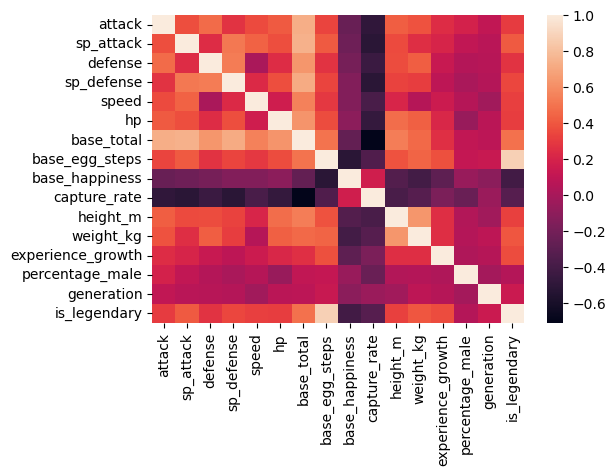

In [711]:
corr = pokemon.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()


According to these data, it is possible to identify a clear negative correlation "capture_rate" и "attack", "sp_attack", "defense",
"sp_defense", "speed", "hp", "base_total".

"base_total" positively correlates with "attack", "sp_attack", "defense",
"sp_defense", "speed", "hp", which is not surprising, since it consists of them (equal to their sum).

It is also logical that height and weight are positively correlated. But it's surprising to me
that weight_kg and speed are not correlated.

You can also see from the visualization that the legendarity of Pokemon has a positive correlation
with base_egg_steps.

Next, I will look at all the listed correlations and also add an analysis of the dependence of some parameters on
the Pokemon generation, its legendarity, its type

Next, I will make a predictive model of the protection value based on the attack data.

And I'll end up looking at the distributions by characteristics
and bringing out the best Pokemon for them.

### I started with this visualization. I know it's very small and I can't see anything, but for some reason I liked it. So I'll leave it (just as a beautiful picture)

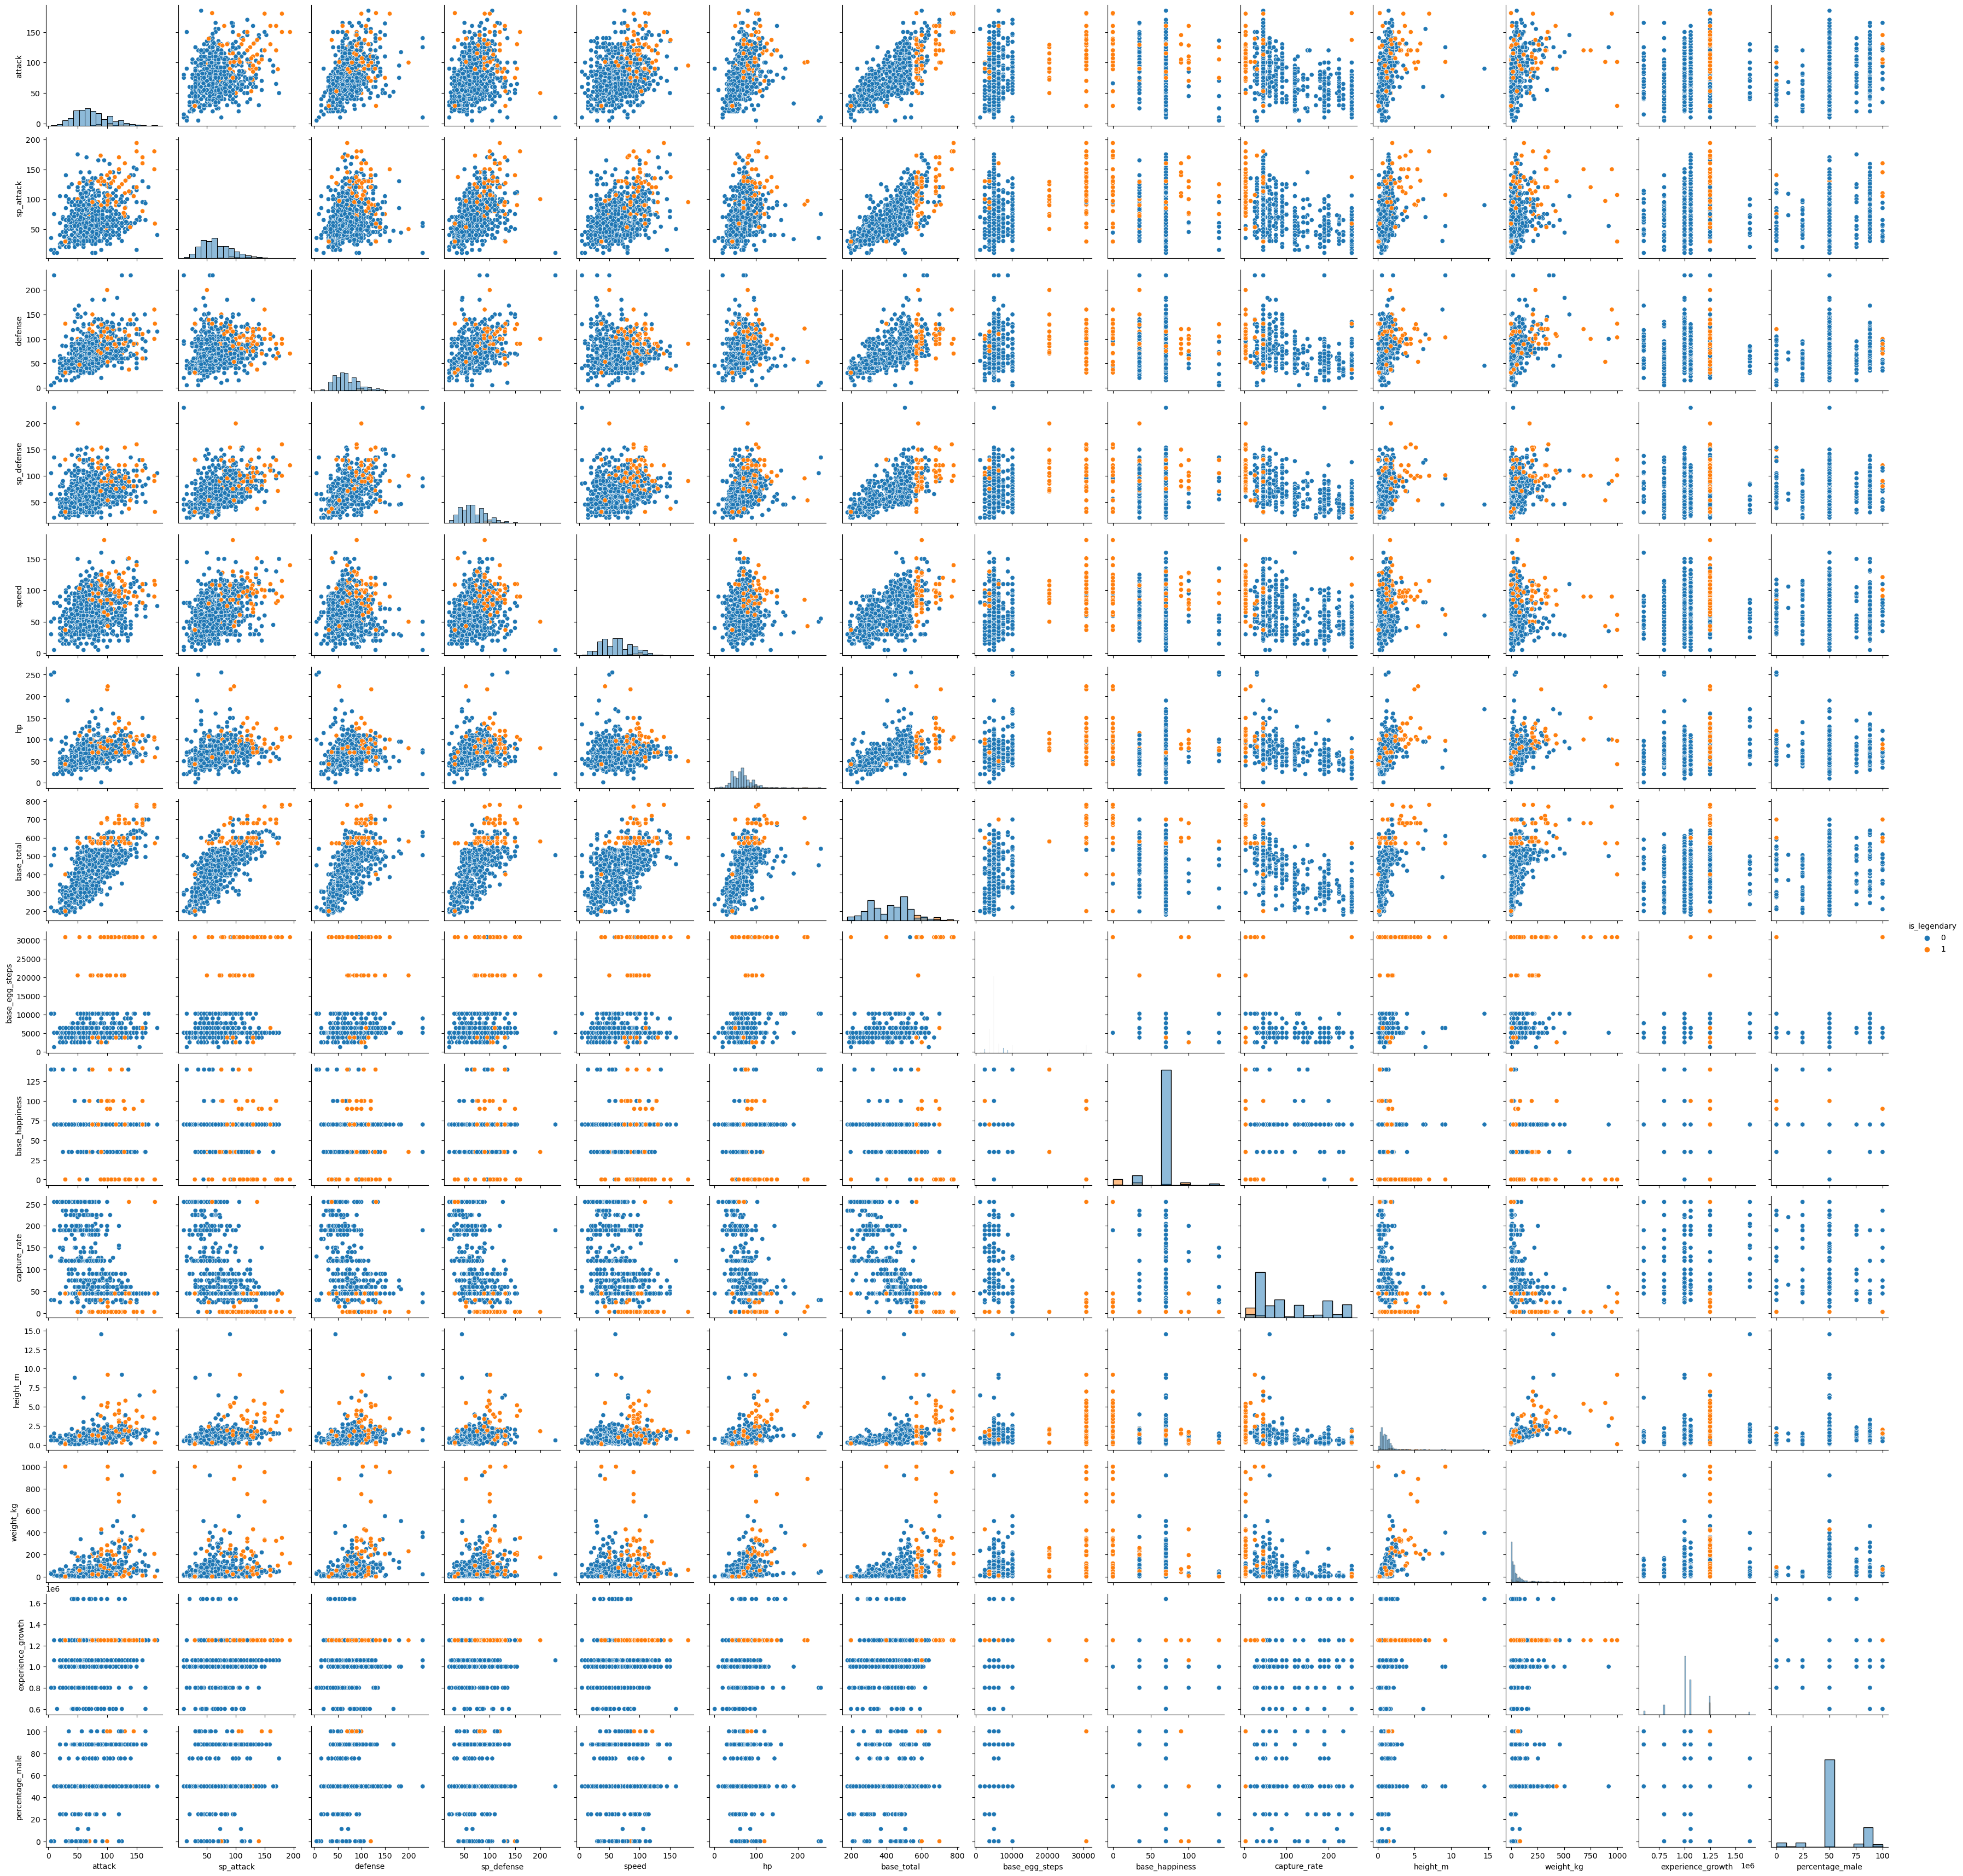

In [717]:
g = sns.PairGrid(pokemon.drop(columns='generation'), hue="is_legendary")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()
# This image can be zoomed by double clikking

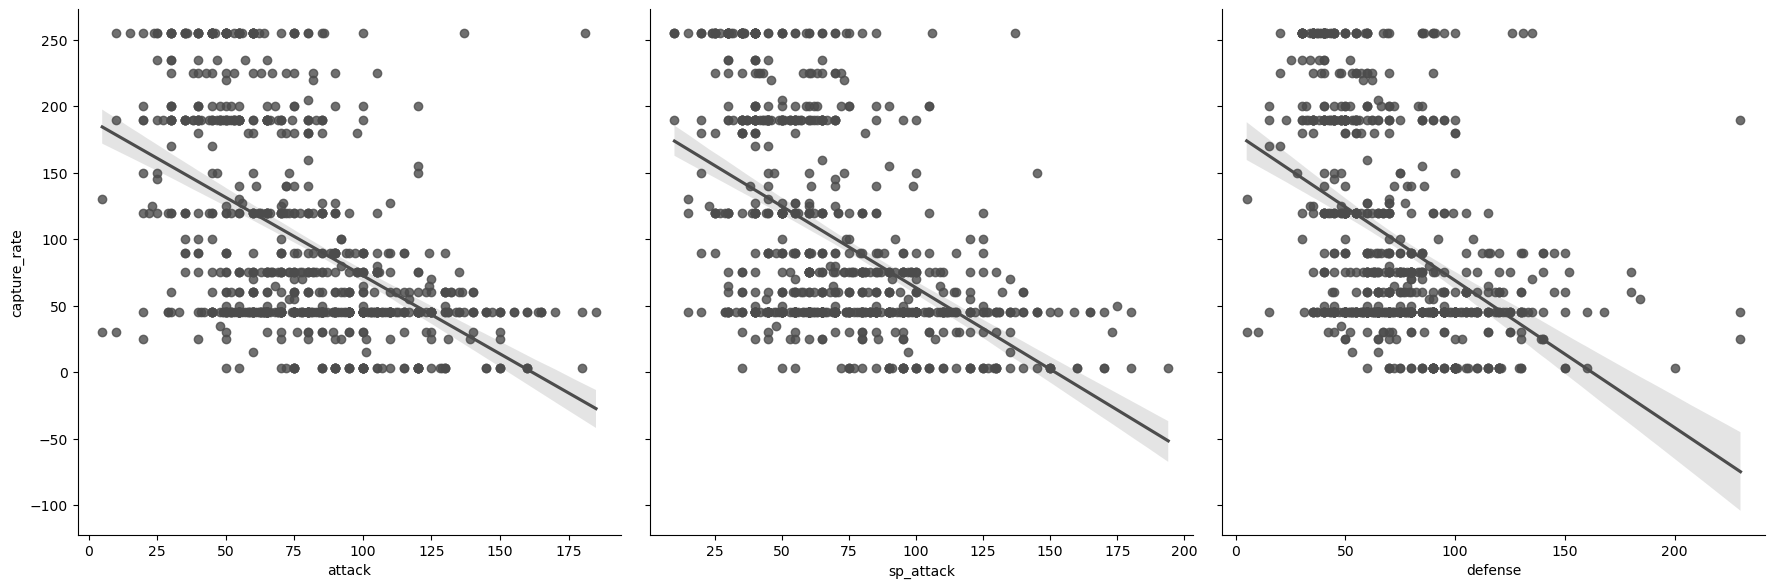

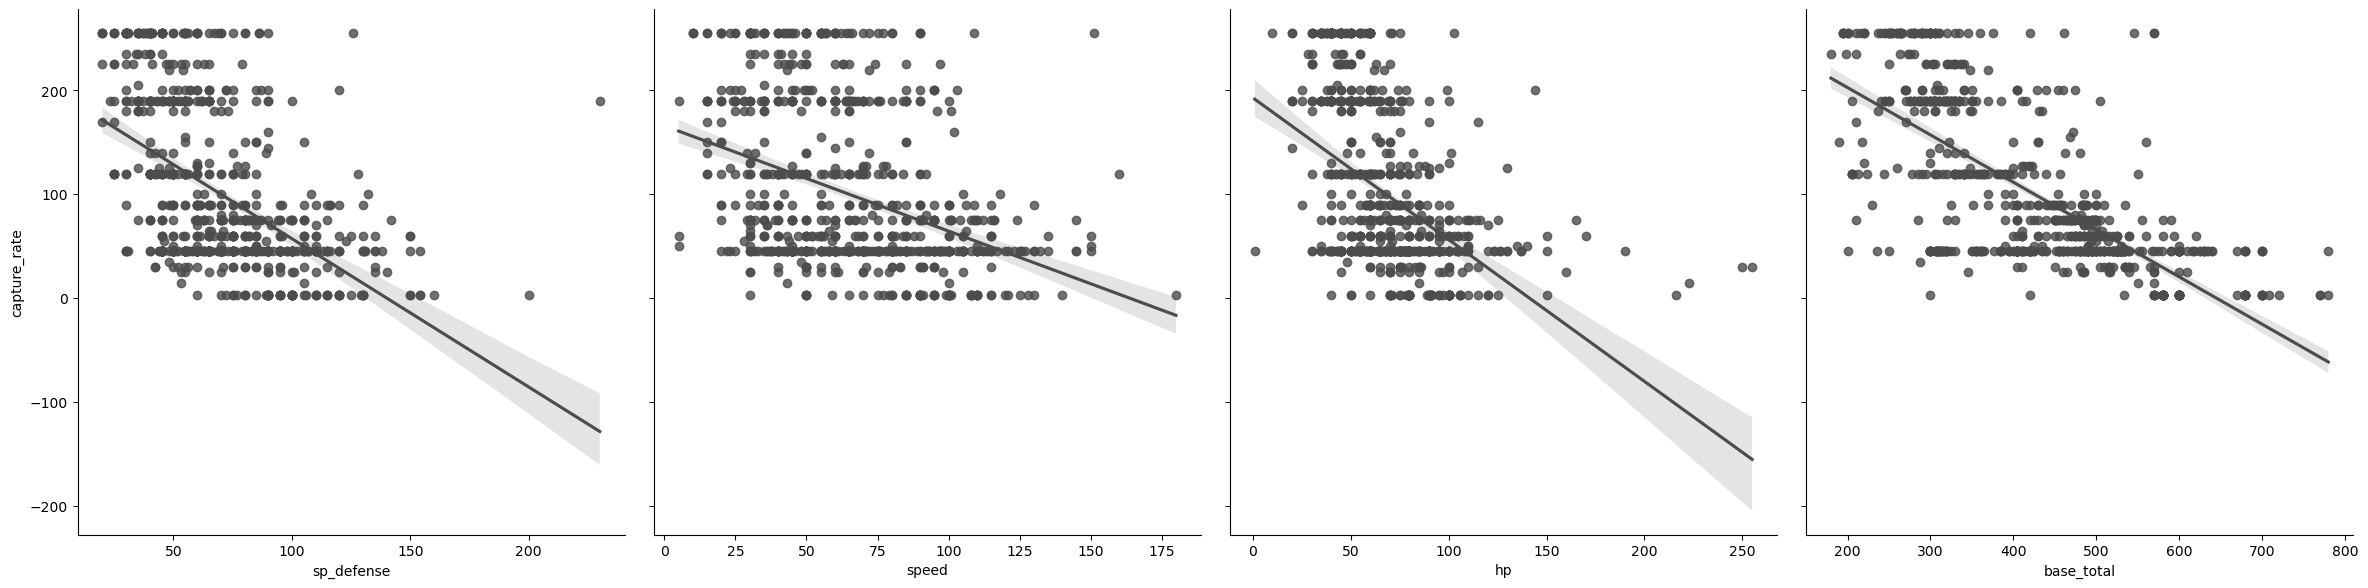

In [718]:
# Proceed plan described above:
g = sns.PairGrid(pokemon, y_vars=["capture_rate"],
                 x_vars=["attack", "sp_attack", "defense"],
                 height=6)
g.map(sns.regplot, color=".3")

g = sns.PairGrid(pokemon, y_vars=["capture_rate"],
                 x_vars=["sp_defense", "speed", "hp", "base_total"],
                 height=6)
g.map(sns.regplot, color=".3")
plt.show()

Indeed, capture_rate negatively depends on these indicators:
For comparison, I will output the capture_rate and base_happiness dependencies

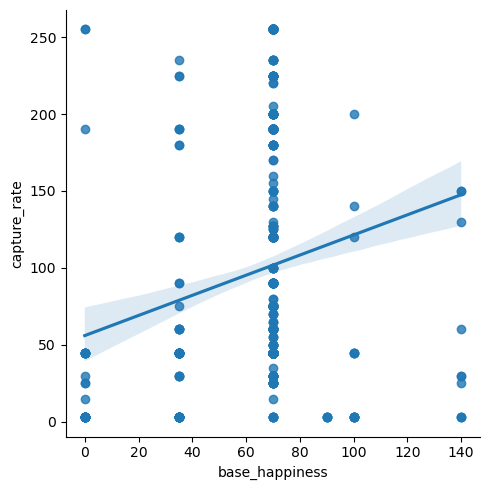

In [719]:
sns.lmplot(y='capture_rate', x="base_happiness", data=pokemon)
plt.show()

Now let's look at the positive correlation of height and weight:
    

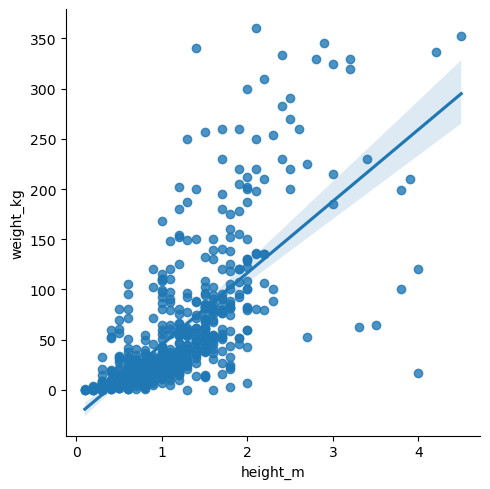

In [720]:
# Got rid of emissions to make it clearer
sns.lmplot(y='weight_kg', x="height_m",
           data=pokemon[(pokemon['height_m'] < 5) &
                        (pokemon['weight_kg'] < 400)])
plt.show()

I will also show the relationship between weight and speed (which is not there)

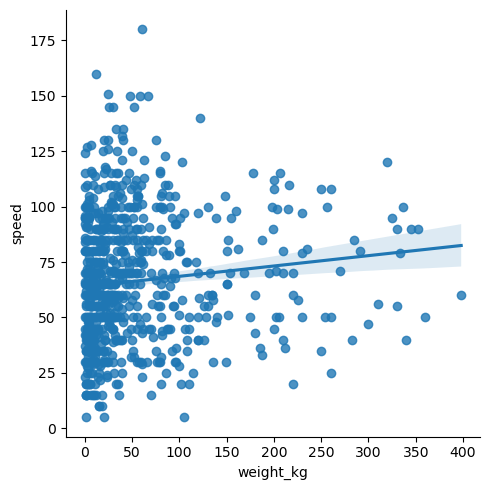

In [721]:
sns.lmplot(x='weight_kg', y="speed", data=pokemon[pokemon['weight_kg'] < 400])
plt.show()

Now let's look at the characteristics of legendary and non-legendary Pokemon.

It can be seen from the correlation table that is_legendary is positively correlated with all
but four fields: base_happiness, capture_rate, percentage_male and generation 


C:\Users\yurak\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\yurak\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\yurak\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\yurak\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\yurak\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.

C:\Users\yurak\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning:

Using the violinpl

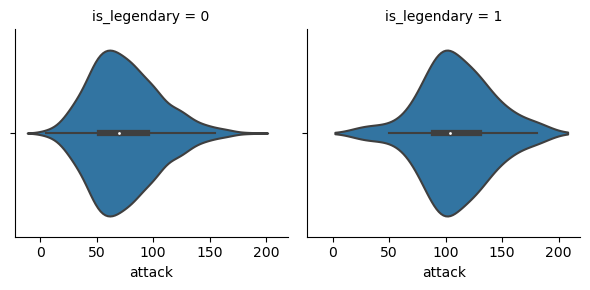

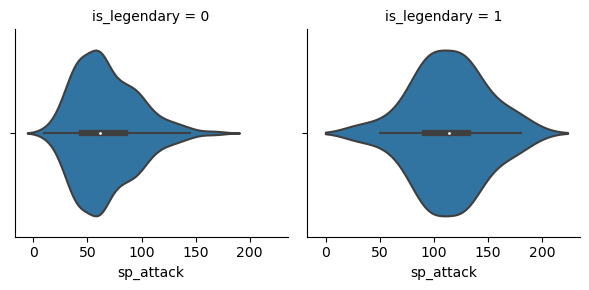

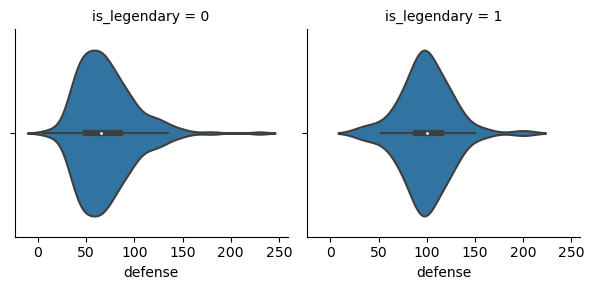

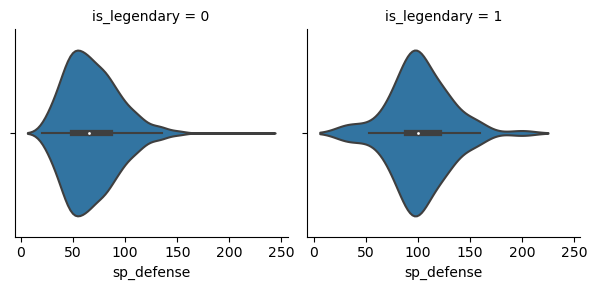

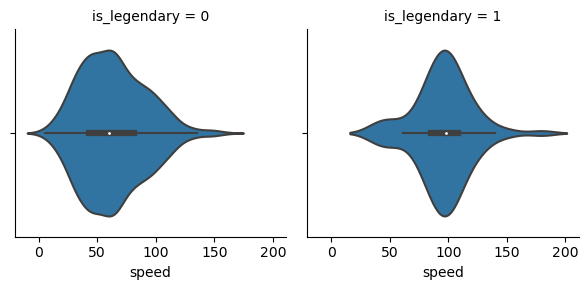

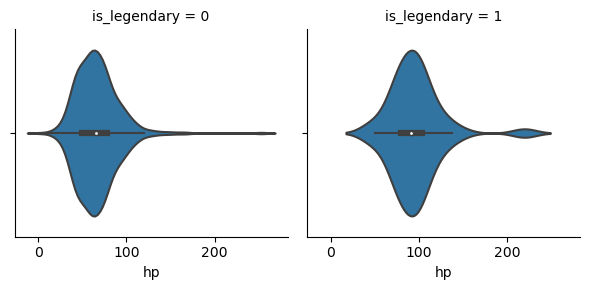

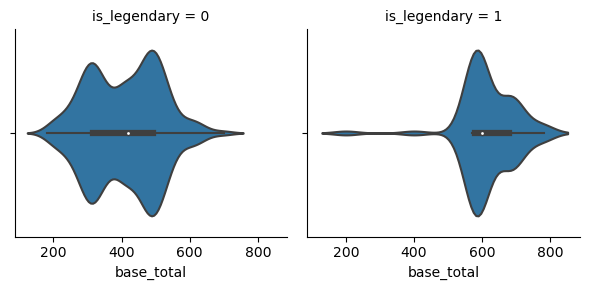

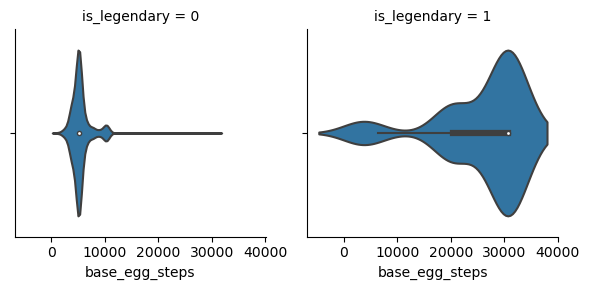

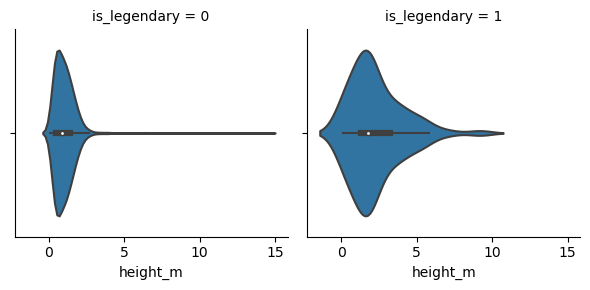

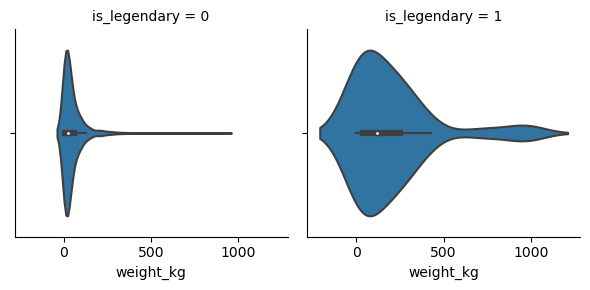

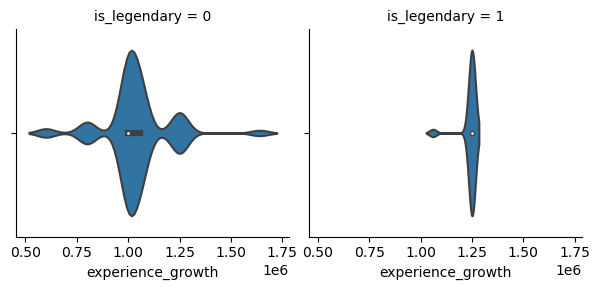

In [722]:
for column in ('attack', 'sp_attack', 'defense', 'sp_defense',
            'speed','hp','base_total', 'base_egg_steps',
            'height_m', 'weight_kg', 'experience_growth'):
    g = sns.FacetGrid(pokemon, col="is_legendary")
    g.map(sns.violinplot, column)
plt.show()


The graphs show that the entire distribution for these characteristics is shifted upwards
in the legendary Pokemon, which suggests that they are stronger on average.

Let's see how many legendary Pokemon there are, and then read the statistics for them,
grouped by "is_legendary":

In [723]:
print(f"We have in dataset {pokemon.is_legendary.sum()} legendary pokemons")

We have in dataset 70 legendary pokemons


In [724]:
# Rename the column for better readability:
pokemon.is_legendary.replace({1:'Legendary',0:'Non-legendary'}, inplace=True)

grouped_pok = pokemon.drop(columns=['name', 'abilities', 'classfication',
                                    'type1', 'type2', 'generation', 
                                   'percentage_male']).groupby('is_legendary')

In [725]:
grouped_pok.mean()

attack   sp_attack   defense  sp_defense      speed  \
is_legendary                                                             
Legendary      109.357143  113.757143  99.40000  101.885714  95.428571   
Non-legendary   74.806849   67.195890  70.49589   67.956164  63.471233   

                      hp  base_total  base_egg_steps  base_happiness  \
is_legendary                                                           
Legendary      95.428571  615.257143    25691.428571       39.214286   
Non-legendary  66.432877  410.358904     5418.082192       67.863014   

               capture_rate  height_m   weight_kg  experience_growth  
is_legendary                                                          
Legendary         17.985714  2.281159  199.350725       1.241851e+06  
Non-legendary    106.506849  1.056681   48.018425       1.037072e+06

In [726]:
grouped_pok.agg(['min', 'max'])

C:\Users\yurak\AppData\Local\Temp\ipykernel_17412\865775658.py:1: FutureWarning:

['img_url', 'img'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



attack      sp_attack      defense      sp_defense      speed  \
                 min  max       min  max     min  max        min  max   min   
is_legendary                                                                  
Legendary         29  181        29  194      31  200         31  200    37   
Non-legendary      5  185        10  175       5  230         20  230     5   

                    ... base_happiness      capture_rate      height_m        \
               max  ...            min  max          min  max      min   max   
is_legendary        ...                                                        
Legendary      180  ...              0  140            3  255      0.1   9.2   
Non-legendary  160  ...              0  140            3  255      0.1  14.5   

              weight_kg        experience_growth           
                    min    max               min      max  
is_legendary                                               
Legendary           0.1  999.9           1059860  1250000  
Non-legendary       0.1  920.0            600000  1640000  

[2 rows x 26 columns]

Here we can compare different statistics of legendary and non-legendary pokemons
Clearly, mean of positive correlated parameter is much better with legendary status
Nevertheless max of parameter not always is better with legendary status 

Now let's go to generation description:

In [727]:
grouped_pok = pokemon.drop(columns=['name', 'abilities', 'classfication',
                                    'type1', 'type2', 'percentage_male']
                          ).groupby('generation')

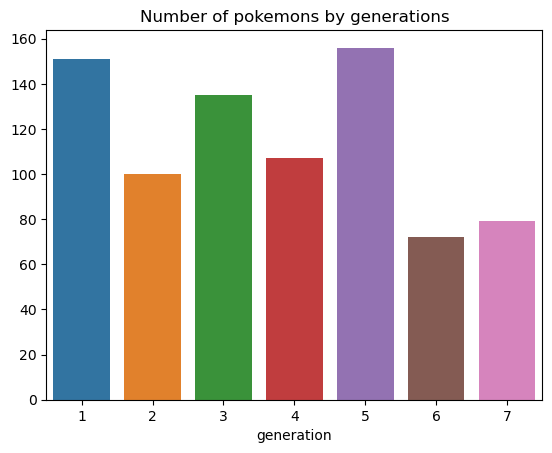

In [728]:
gen_cnt = grouped_pok.generation.count()
# Plot the barchart 
sns.barplot(x=gen_cnt.index, y=gen_cnt)
plt.title('Number of pokemons by generations')
# Set ylabel to nothing
plt.xlabel('generation')
plt.ylabel(None)
plt.show()

From this barplot we see that the most new pokemons was in first and fifth generations. The least - in sixth.

There is strong decrease between 5_th and 6_th generations.

Let's check the strength of pokemons (by them base_total) in dependence of generation:

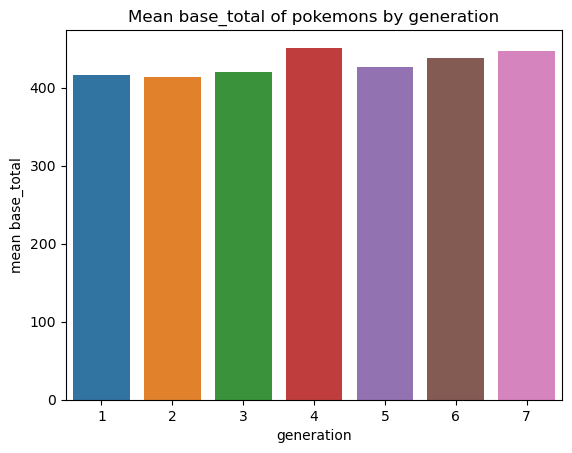

In [729]:
gen_mean = grouped_pok.mean()
# Plot the barchart 
sns.barplot(x=gen_mean.index, y=gen_mean.base_total)
plt.title('Mean base_total of pokemons by generation')
# Set ylabel to nothing
plt.xlabel('generation')
plt.ylabel('mean base_total')
plt.show()

There is no certain dependence :(

Let's see the same for Pokemon types (I'll take only type1,
but this is not entirely objective)

In [730]:
grouped_pok = pokemon.drop(columns=['name', 'abilities', 'classfication',
                                    'type2', 'percentage_male',
                                    'generation']).groupby('type1')

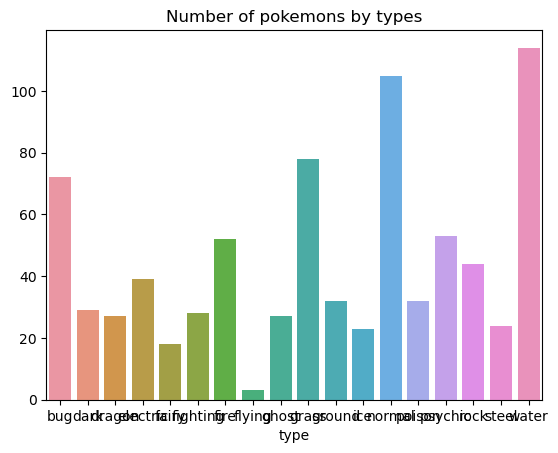

type1
flying        3
fairy        18
ice          23
steel        24
ghost        27
dragon       27
fighting     28
dark         29
ground       32
poison       32
electric     39
rock         44
fire         52
psychic      53
bug          72
grass        78
normal      105
water       114
Name: type1, dtype: int64

In [731]:
type_cnt = grouped_pok.type1.count()
# Plot the barchart 
sns.barplot(x=type_cnt.index, y=type_cnt)
plt.title('Number of pokemons by types')
# Set ylabel to nothing
plt.xlabel('type')
plt.ylabel(None)
plt.show()
type_cnt.sort_values()

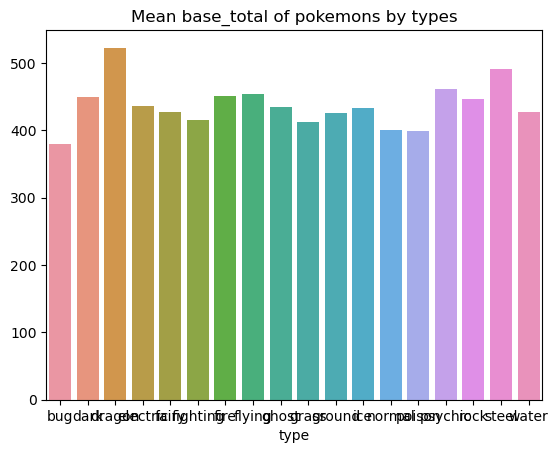

type1
bug         380.430556
poison      399.562500
normal      401.295238
grass       412.576923
fighting    414.821429
ground      426.093750
water       426.789474
fairy       427.166667
ice         433.608696
ghost       434.703704
electric    436.153846
rock        446.068182
dark        449.758621
fire        450.634615
flying      453.333333
psychic     461.264151
steel       491.583333
dragon      522.777778
Name: base_total, dtype: float64

In [732]:
type_mean = grouped_pok.mean()
# Plot the barchart 
sns.barplot(x=type_mean.index, y=type_mean.base_total)
plt.title('Mean base_total of pokemons by types')
# Set ylabel to nothing
plt.xlabel('type')
plt.ylabel(None)
plt.show()
type_mean.base_total.sort_values()

It can be seen that here the type plays a big role for the strength of the Pokemon (the biggest difference between the averages is almost 1.5 times)

### Try to predict "defense" using "attack", "sp_defence" and "weight_kg" (most correlated indecators)

In [733]:
# Look at the current correlation coefficients:
print(f"""Correation coefficient between attack and defense = \
{pokemon["defense"].corr(pokemon["attack"])}""")

print(f"""Correation coefficient between sp_defense and defense = \
{pokemon["defense"].corr(pokemon["sp_defense"])}""")

print(f"""Correation coefficient between weight_kg and defense = \
{pokemon["defense"].corr(pokemon["weight_kg"])}""")

Correation coefficient between attack and defense = 0.4694710419589058
Correation coefficient between sp_defense and defense = 0.5262507300968123
Correation coefficient between weight_kg and defense = 0.4240196398416919


In [734]:
# We form the data on the basis of which we will train the model
# # To do this, we will remove all empty values from the dataset:
pokemon_fit = pokemon[~pokemon['weight_kg'].isna()]
X = np.array([[pokemon_fit.attack.iloc[0],
               pokemon_fit.sp_defense.iloc[0],
               pokemon_fit.weight_kg.iloc[0]]])
for i in range(1, len(pokemon_fit)):
    X = np.append(X, [[pokemon_fit.attack.iloc[i],
                      pokemon_fit.sp_defense.iloc[i], 
                      pokemon_fit.weight_kg.iloc[i]]], axis = 0)
    
y = np.array(pokemon_fit.defense)

# Split a Dataset into Train and Test Sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=42)
# Training the model:
reg = LinearRegression().fit(X_train, y_train)

Look at the indicators of the model:

In [735]:
print(f'Score of the model = {reg.score(X, y)}')
print(f'Coefficients are {reg.coef_}')
print(f'Intercept in equasion is {reg.intercept_}')

Score of the model = 0.43086901102345343
Coefficients are [0.27085014 0.45651539 0.06754891]
Intercept in equasion is 14.987972036651719


Evaluate the accuracy of the constructed model:

In [736]:
from sklearn import metrics
# Find predicted values of defense using test sample:
test_pred = reg.predict(X_test)
print(f'MSE = {metrics.mean_squared_error(y_test, test_pred)}')
print(f'MAE = {metrics.mean_absolute_error(y_test, test_pred)}')
print(f'MAPE = {metrics.mean_absolute_percentage_error(y_test, test_pred)}')

MSE = 612.910302943159
MAE = 17.956975457884933
MAPE = 0.24412189217011976


We get an average prediction error of 25%, which is quite a lot,
but still the model can be useful for prediction.

### Now let's look at the distributions of quantities in our dataset:

(I will look at the main parameters of Pokemon strength:
attack, defense, speed and HP)

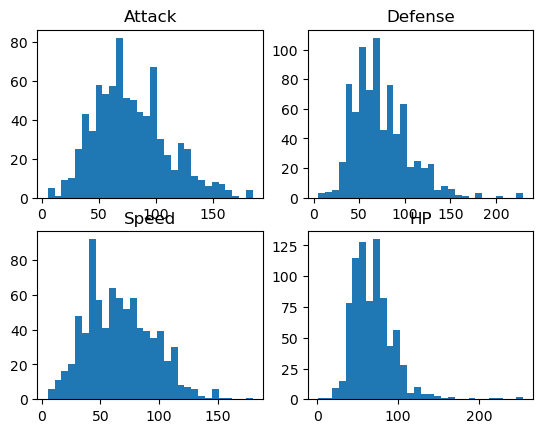

In [737]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].hist(pokemon.attack, bins=30)
ax[0, 0].set_title('Attack')

ax[0, 1].hist(pokemon.defense, bins=30)
ax[0, 1].set_title('Defense')

ax[1, 0].hist(pokemon.speed, bins=30)
ax[1, 0].set_title('Speed')

ax[1, 1].hist(pokemon.hp, bins=30)
ax[1, 1].set_title('HP')
plt.show()

The distribution of these characteristics resembles a normal distribution.

Let's see which one is closest to the normal distribution?

To do this, we calculate p-value for each field, using the Shapiro-Wilko criterion:

In [738]:
print(f'P-value of Attack = {stats.shapiro(pokemon.attack).pvalue}')
print(f'P-value of Defense = {stats.shapiro(pokemon.defense).pvalue}')
print(f'P-value of Speed = {stats.shapiro(pokemon.speed).pvalue}')
print(f'P-value of HP = {stats.shapiro(pokemon.hp).pvalue}')

P-value of Attack = 3.2544855699256914e-09
P-value of Defense = 1.925294308580449e-17
P-value of Speed = 1.3869882131700706e-08
P-value of HP = 3.554473763660716e-23


Our hypothesis that these distributions are normal was confirmed with a significance level greater than 0.1% for each field.

According to the results of the criterion, the HP distribution is most likely normal.

### Now let's move our table (I want to note the changed one - with links to pictures) to the SQL database so that it can be accessed via SQL queries

In [739]:
# Create new connection ("pokemon_db" will created if it didn't exist)
conn = sqlite3.connect("pokemon_db")
cur = con.cursor()

In [740]:
# Push the DataFrame to SQL: (картинки не поддерживаются SQL)
pokemon.drop(columns='img').to_sql("pokemon", conn, if_exists="replace")

800

Now we can execute some queries:

In [741]:
# Характеристики по типам 
query_1 = cur.execute("""
                    SELECT type1, avg(attack) as attack,
                           avg(defense) as defense,
                           avg(speed) as speed,
                           avg(hp) as hp,
                           avg(base_total) as base_total
                    FROM pokemon
                    GROUP BY 1
                    """)
for row in query_1:
    print(row)

('bug', 70.125, 70.84722222222223, 63.56944444444444, 56.72222222222222, 380.43055555555554)
('dark', 87.79310344827586, 70.51724137931035, 75.3103448275862, 72.55172413793103, 449.7586206896552)
('dragon', 106.4074074074074, 86.25925925925925, 76.11111111111111, 79.85185185185185, 522.7777777777778)
('electric', 70.82051282051282, 61.82051282051282, 85.41025641025641, 60.51282051282051, 436.15384615384613)
('fairy', 62.111111111111114, 68.16666666666667, 53.666666666666664, 73.94444444444444, 427.1666666666667)
('fighting', 99.17857142857143, 66.39285714285714, 64.28571428571429, 71.42857142857143, 414.82142857142856)
('fire', 81.5, 67.78846153846153, 73.34615384615384, 68.73076923076923, 450.63461538461536)
('flying', 66.66666666666667, 65.0, 99.66666666666667, 68.0, 453.3333333333333)
('ghost', 72.74074074074075, 79.51851851851852, 58.333333333333336, 63.370370370370374, 434.7037037037037)
('grass', 73.76923076923077, 70.87179487179488, 59.02564102564103, 65.35897435897436, 412.5769

In [742]:
# Characteristics depending on legendarity
query_2 = cur.execute("""
                    SELECT is_legendary,
                           avg(attack) as attack,
                           avg(defense) as defense,
                           avg(speed) as speed,
                           avg(hp) as hp,
                           avg(base_total) as base_total
                    FROM pokemon
                    GROUP BY 1
                    """)
for row in query_2:
    print(row)

('Legendary', 109.35714285714286, 99.4, 95.42857142857143, 95.42857142857143, 615.2571428571429)
('Non-legendary', 74.80684931506849, 70.4958904109589, 63.47123287671233, 66.43287671232876, 410.35890410958905)


### And finally: let's bring out the strongest Pokemon according to 6 characteristics (I wanted it that way):attack, defense, speed, hp, percentage_male and (most important) base_total


In [743]:
attack_pokemon = pokemon[pokemon['attack'] == 
                         pokemon.attack.max()].iloc[0]
defense_pokemon = pokemon[pokemon['defense'] ==
                          pokemon.defense.max()].iloc[0]
speed_pokemon = pokemon[pokemon['speed'] ==
                        pokemon.speed.max()].iloc[0]
hp_pokemon = pokemon[pokemon['hp'] == 
                     pokemon.hp.max()].iloc[0]
male_pokemon = pokemon[pokemon['percentage_male'] == 
                       pokemon.percentage_male.max()].iloc[0]
dominator_pokemon = pokemon[pokemon['base_total'] ==
                            pokemon.base_total.max()].iloc[0]

And presenting results:

The most dangerous Pokemon is Heracross with attack = 185


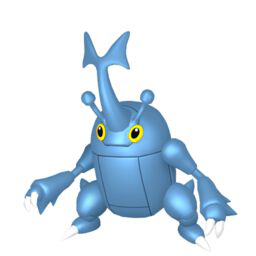

In [744]:
print(f'The most dangerous Pokemon is {attack_pokemon.iloc[0]} \
with attack = {attack_pokemon.attack}')
attack_pokemon.img

The most protected Pokemon is Steelix with defense = 230


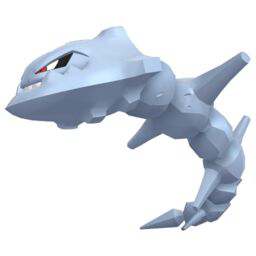

In [745]:
print(f'The most protected Pokemon is {defense_pokemon.iloc[0]} \
with defense = {defense_pokemon.defense}')
defense_pokemon.img

The fastest Pokemon is Deoxys with speed = 180


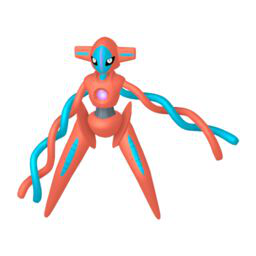

In [746]:
print(f'The fastest Pokemon is {speed_pokemon.iloc[0]} \
with speed = {speed_pokemon.speed}')
speed_pokemon.img

The healthiest Pokemon is Blissey with HP = 255


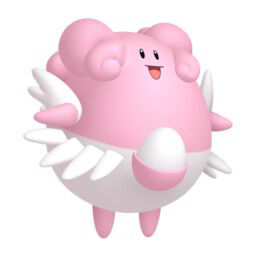

In [747]:
print(f'The healthiest Pokemon is {hp_pokemon.iloc[0]} \
with HP = {hp_pokemon.hp}')
hp_pokemon.img

The most masculine Pokemon is Nidoran♂ with percentage_male = 100.0


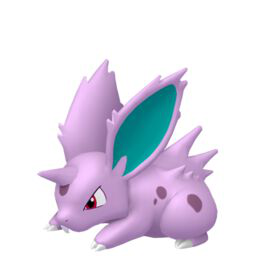

In [748]:
print(f'The most masculine Pokemon is {male_pokemon.iloc[0]} \
with percentage_male = {male_pokemon.percentage_male}')
male_pokemon.img

The strongest Pokemon is Mewtwo with base_total = 780


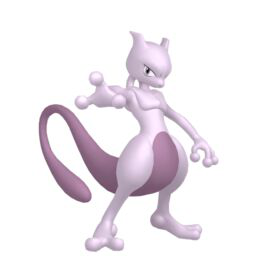

In [749]:
print(f'The strongest Pokemon is {dominator_pokemon.iloc[0]} \
with base_total = {dominator_pokemon.base_total}')
dominator_pokemon.img

# This is the end of my work. I hope you enjoyed it)
I decided to finally insert the well-known Pikachu

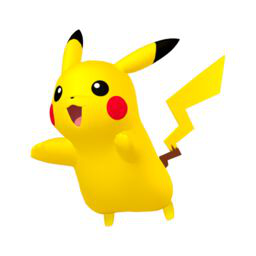

In [750]:
Pikachu =pokemon[pokemon['name'] == 'Pikachu'].iloc[0]
Pikachu.img